In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

import seaborn as sns
from sklearn.decomposition import PCA


In [2]:
path = r'diabetes_prediction_dataset.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [8]:
## label encoding

categorical_columns = ['gender', 'smoking_history']

le = LabelEncoder()

for i in categorical_columns:
    df[i] = le.fit_transform(df[i])

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [9]:
le.classes_

array(['No Info', 'current', 'ever', 'former', 'never', 'not current'],
      dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int32  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int32  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int32(2), int64(4)
memory usage: 6.1 MB


In [11]:
labels = df['diabetes']
features = df.drop('diabetes', axis=1)

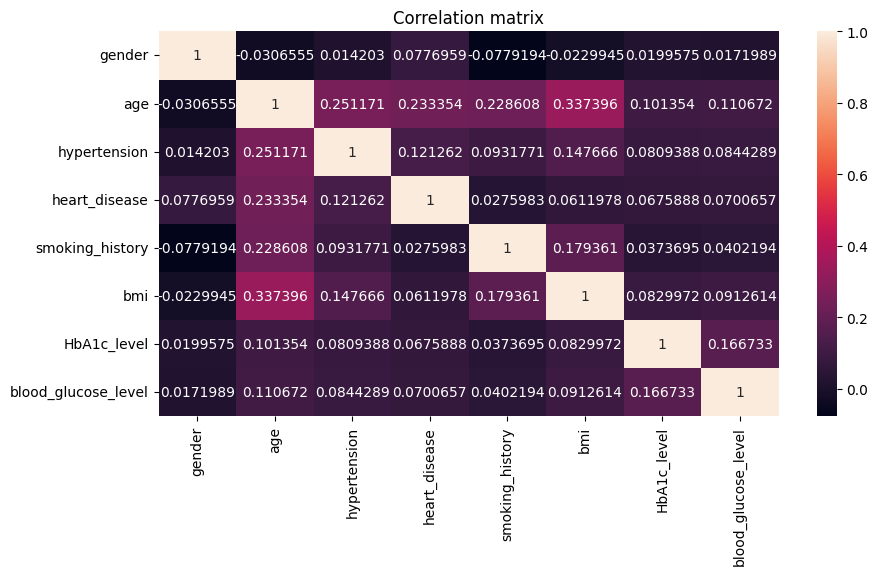

In [12]:
def show_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(10, 5))
    sns.heatmap(cm, xticklabels=labels, yticklabels=labels, 
              annot=True, fmt='g')
    plt.title(title)
    plt.show()

cm = features.corr()

# heatmap showing the corelation between some sample features in the dataset
show_confusion_matrix(cm, features.columns, 'Correlation matrix')

<Axes: xlabel='diabetes', ylabel='count'>

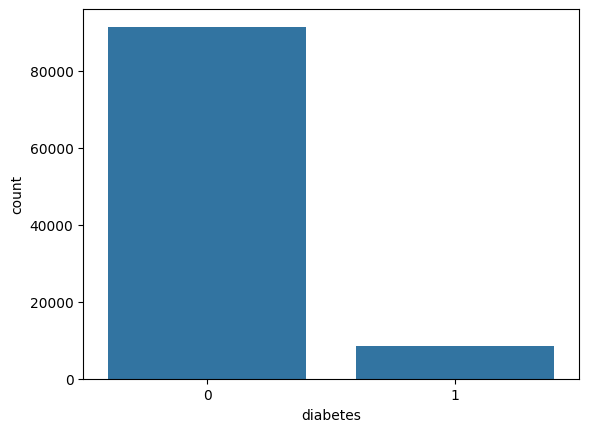

In [13]:
# checking for imbalance
sns.countplot(x=labels)

In [14]:
# handling imbalance


over = SMOTE()

steps = [('o', over)]
pipeline = Pipeline(steps=steps)

X_b, y_b = pipeline.fit_resample(features, labels)

<Axes: xlabel='diabetes', ylabel='count'>

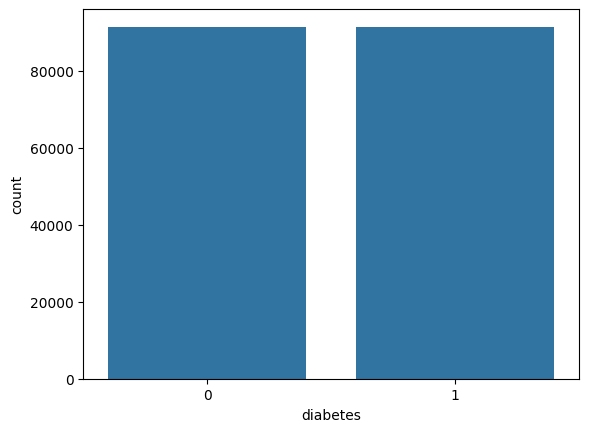

In [15]:
sns.countplot(x=y_b)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(np.array(X_b), y_b, test_size=0.2)

## Models

In [18]:
pipeline = Pipeline([
                ('normalization', MinMaxScaler()),
                ('classifier', DecisionTreeClassifier())
            ])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('normalization', MinMaxScaler()),
                ('classifier', DecisionTreeClassifier())])

In [19]:
predictions_pipe = pipeline.predict(x_test)
print('Test accuracy: ', accuracy_score(predictions_pipe, y_test))
print('F1_score: ', f1_score(y_test, predictions_pipe))
print('Precision_score: ', precision_score(y_test, predictions_pipe))

Test accuracy:  0.9719398907103826
F1_score:  0.9718360071301247
Precision_score:  0.9692046822010721


In [83]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)

RandomForestClassifier()

In [84]:
predictions_rf = rf_classifier.predict(x_test)
print('Test accuracy: ', accuracy_score(predictions_rf, y_test))
print('F1_score: ', f1_score(y_test, predictions_rf))
print('Precision_score: ', precision_score(y_test, predictions_rf))

Test accuracy:  0.9744535519125683
F1_score:  0.9744151046654809
Precision_score:  0.9767403587689945


In [87]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

estimators = [('DecisionTrees', dt), ('RandomForest', rf)]

In [88]:
ensemble_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
ensemble_classifier.fit(x_train, y_train)

StackingClassifier(estimators=[('DecisionTrees', DecisionTreeClassifier()),
                               ('RandomForest', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [89]:
predictions = ensemble_classifier.predict(x_test)
print('Test accuracy: ', accuracy_score(predictions, y_test))
print('F1_score: ', f1_score(y_test, predictions))
print('Precision_score: ', precision_score(y_test, predictions))

Test accuracy:  0.9769672131147541
F1_score:  0.9769413824229328
Precision_score:  0.9788960149098285


In [24]:
filename = 'classifier.sav'
joblib.dump(pipeline, filename)

['classifier.sav']